In [141]:
# Logistic Regression | Load the libraries
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
# Download database
train = pd.read_csv('D:/machine learning/train.csv')
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [142]:
train.count()

PassengerId    891
Survived       891
Pclass         891
Name           891
Sex            891
Age            714
SibSp          891
Parch          891
Ticket         891
Fare           891
Cabin          204
Embarked       889
dtype: int64

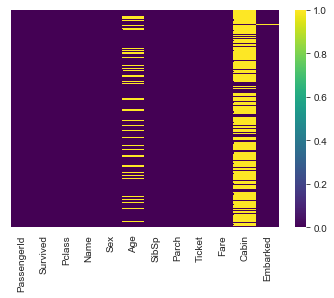

In [143]:
# Use heatmap to determine if there are missing data
sns.heatmap(train.isnull(),yticklabels=False,cbar=True,cmap='viridis')

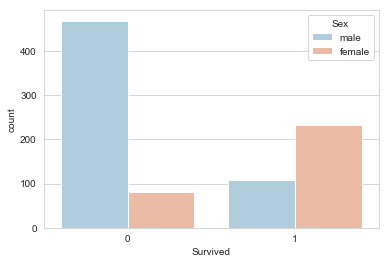

In [144]:
#count-plot of people survided 
sns.set_style('whitegrid')
sns.countplot(x='Survived', hue='Sex', data=train, palette='RdBu_r')

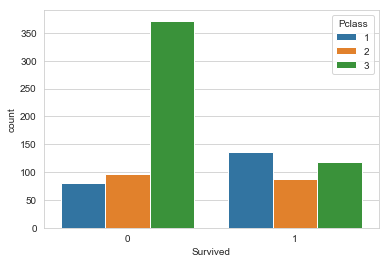

In [145]:
# Number of people who survived according to their Passenger Class
sns.set_style('whitegrid')
sns.countplot(x='Survived', hue='Pclass', data=train)

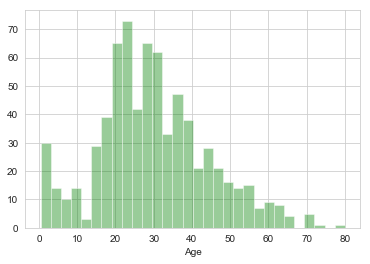

In [146]:
#distribution plot of age of the people
sns.distplot(train['Age'].dropna(), kde=False, bins=30, color='Green')

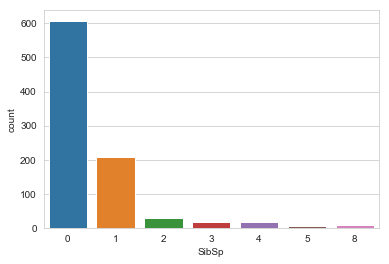

In [147]:
#countplot of the people having siblings or spouce
sns.countplot(x='SibSp',data=train)

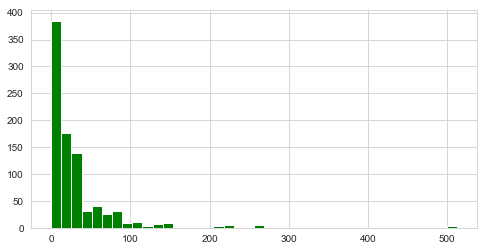

In [148]:
#distribution plot of the ticket fare
train['Fare'].hist(color='green',bins=40,figsize=(8,4))

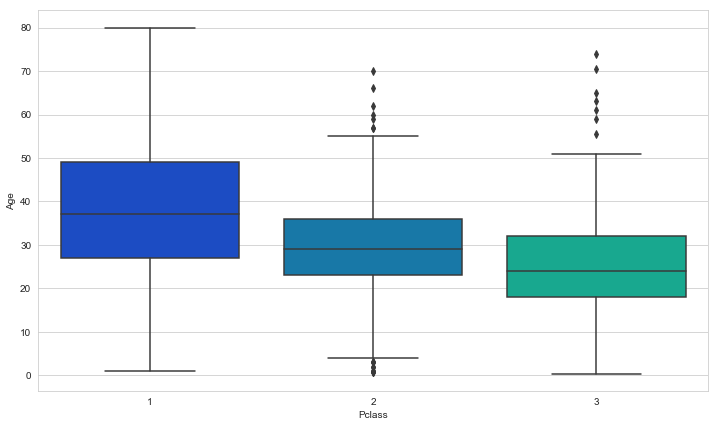

In [149]:
#boxplot with age on y-axis and Passenger class on x-axis.
plt.figure(figsize=(12, 7))
sns.boxplot(x='Pclass',y='Age',data=train,palette='winter')

In [107]:
def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    if Pclass == 1:
        return 37
    elif Pclass == 2:
        return 29
    elif Pclass == 3:
        return 24
    else:
        return Age

In [116]:
train['Age'] = train[['Age','Pclass']].apply(impute_age,axis=1)

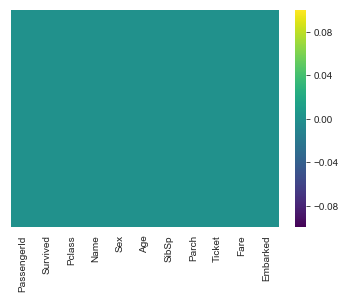

In [151]:
# The database needs to be cleaned for missing data or NaN
train.drop('Cabin',axis=1,inplace=True)
train.dropna(inplace=True)
train.head()

sns.heatmap(train.isnull(),yticklabels=False,cbar=True,cmap='viridis')

In [152]:
# We transform categorical data into dummy variables
sex = pd.get_dummies(train['Sex'],drop_first=True)
embark = pd.get_dummies(train['Embarked'],drop_first=True)
#drop the sex,embarked,name and tickets columns
train.drop(['Sex','Embarked','Name','Ticket'],axis=1,inplace=True)
#concatenate new sex and embark column to our train dataframe
train = pd.concat([train,sex,embark],axis=1)
#check the head of dataframe
train.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,1,0,3,22.0,1,0,7.2500,1,0,1
1,2,1,1,38.0,1,0,71.2833,0,0,0
2,3,1,3,26.0,0,0,7.9250,0,0,1
3,4,1,1,35.0,1,0,53.1000,0,0,1
4,5,0,3,35.0,0,0,8.0500,1,0,1


In [153]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(train.drop('Survived',axis=1), 
           train['Survived'], test_size=0.30, 
            random_state=101)

In [121]:
from sklearn.linear_model import LogisticRegression
#create an instance and fit the model 
logmodel = LogisticRegression()
logmodel.fit(X_train, y_train)

C:\Users\tonyd\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [132]:
# Predictions
predictions = logmodel.predict(X_test)

In [127]:
# Determine the model performance metrics
from sklearn.metrics import classification_report
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.81      0.93      0.86       163
           1       0.85      0.65      0.74       104

   micro avg       0.82      0.82      0.82       267
   macro avg       0.83      0.79      0.80       267
weighted avg       0.82      0.82      0.81       267



In [129]:
# Confusion Matrix
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, predictions))

[[151  12]
 [ 36  68]]


In [131]:
url='https://medium.com/@anishsingh20/logistic-regression-in-python-423c8d32838b'

In [134]:
# Receiver Operating Curve (ROC)
Y_scores = logmodel.decision_function(X_test)
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, Y_scores)


In [135]:
# Area Under the Curve (AUC) 
from sklearn.metrics import auc
auc(fpr, tpr)


0.8479235488437943

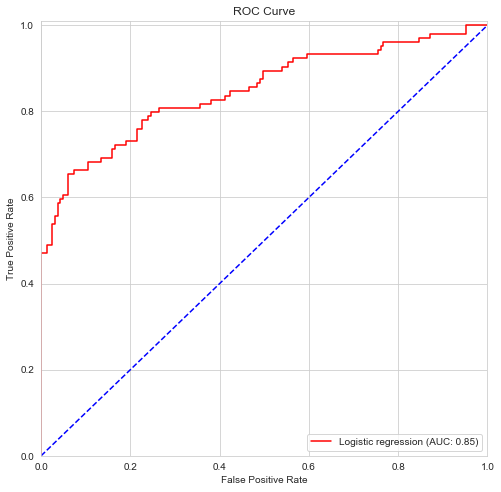

In [136]:
# ROC curve with Matplotlib
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 8))
plt.plot(fpr, tpr, color='red', label='Logistic regression (AUC: %.2f)'
% auc(fpr, tpr))
plt.plot([0, 1], [0, 1], color='blue', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.01])
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")
plt.show() 
